In [0]:
import numpy as np
import pylab
from matplotlib import cm
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import librosa
audio_path = '/content/drive/My Drive/fma_small/fma_small/fma1/000/000002.mp3'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))


<class 'numpy.ndarray'> <class 'int'>


In [0]:
print(x.shape, sr)

(660984,) 22050


In [0]:
import IPython.display as ipd
ipd.Audio(audio_path)

## MFCC

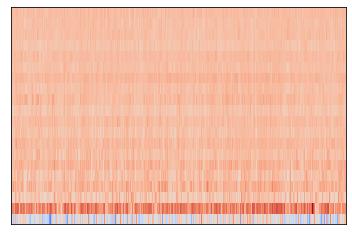

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

mfccs = librosa.feature.mfcc(y=x, sr=sr)
log_power = librosa.power_to_db(mfccs, ref=np.max)
ax = librosa.display.specshow(mfccs, sr=sr)
plt.savefig('foo.jpg')

## After Log transformation

The axes and labels were removes and the plot was resized to have a square shape

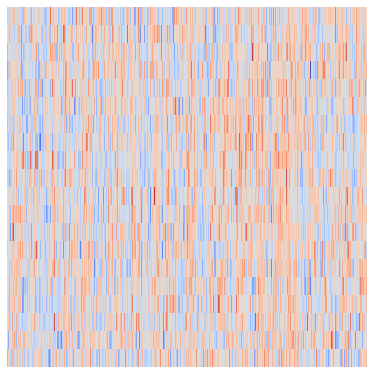

In [0]:
import sklearn
mfccs = librosa.feature.mfcc(y=x, sr=sr)


mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
pylab.figure(figsize=(5,5))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])

librosa.display.specshow(mfccs, sr=sr)

## Using a different color-map

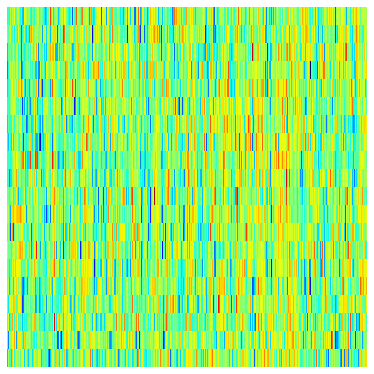

In [0]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)


mfccs = sklearn.preprocessing.scale(mfccs, axis=1)


pylab.figure(figsize=(5,5))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
librosa.display.specshow(mfccs, cmap=cm.jet)

Similarly for Mel-Spectrogram

In [0]:
import sklearn
import seaborn
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

mel = librosa.feature.melspectrogram(y=x, sr=sr)

log_power = librosa.power_to_db(mel, ref=np.max)

mel2 = sklearn.preprocessing.scale(mel, axis=1)

librosa.display.specshow(mel, sr=sr, x_axis='time')

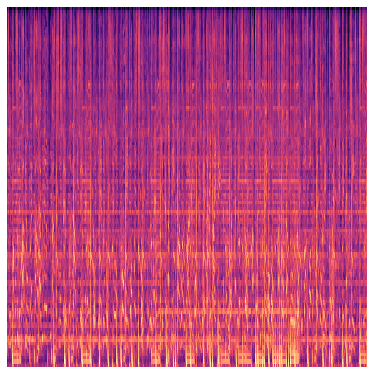

In [0]:
mel = librosa.feature.melspectrogram(y=x, sr=sr)

log_power = librosa.power_to_db(mel, ref=np.max)

pylab.figure(figsize=(5,5))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
ax = librosa.display.specshow(log_power)

fig = ax.get_figure()
fig.savefig('/content/drive/My Drive/Music Genre/Images/figure.png')

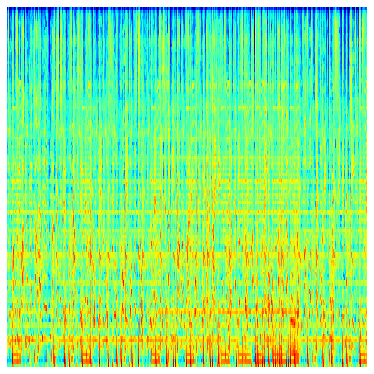

In [0]:
mel = librosa.feature.melspectrogram(y=x, sr=sr)

log_power = librosa.power_to_db(mel, ref=np.max)

pylab.figure(figsize=(5,5))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
librosa.display.specshow(log_power, cmap=cm.jet)

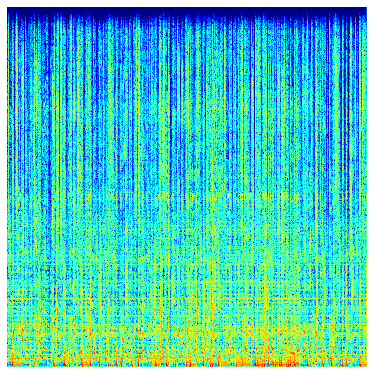

In [0]:
mel = librosa.feature.melspectrogram(y=x, sr=sr)


S = np.abs(librosa.stft(x))

log_power = librosa.power_to_db(S**2, ref=np.max)

pylab.figure(figsize=(5,5))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
librosa.display.specshow(log_power, cmap=cm.jet)

In [0]:
import librosa
x, fs = librosa.load('/content/drive/My Drive/fma_small/fma_small/000/000002.mp3')
mfccs = librosa.feature.mfcc(x, sr=fs)

In [0]:
mfccs.shape

In [0]:
!pip install ffmpeg-python



In [0]:
basepath = "/content/drive/My Drive/fma_small/fma_small/"
paths = []
for entry in os.listdir(basepath):
  if entry == "README.txt" or entry == "checksums":
    continue
  dir1 = os.path.join(basepath, entry) +'/'
  print(dir1)
  for filename in os.listdir(dir1):
   audio_path = filename
   x , sr = librosa.load(dir1 + audio_path)
   mel = librosa.feature.melspectrogram(y=x, sr=sr)
   log_power = librosa.power_to_db(mel, ref=np.max)
   pylab.figure(figsize=(5,5))
   pylab.axis('off') 
   pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
   
   ax = librosa.display.specshow(log_power, cmap=cm.jet)
   fig = ax.get_figure()
   
   str1 = filename.split('.')[0].lstrip('0');
   fig.savefig('/content/drive/My Drive/Music Genre/Images/'+ str1)
   plt.close(fig)


In [0]:
directory = '/content/drive/My Drive/fma_small/fma_small/133/'
import matplotlib.pyplot as plt
#plt.ioff()

for filename in os.listdir(directory):
   audio_path = filename
   print(audio_path)
   
   if audio_path == '133297.mp3':
    continue
   
   x , sr = librosa.load(directory + audio_path)
   mel = librosa.feature.melspectrogram(y=x, sr=sr)
   log_power = librosa.power_to_db(mel, ref=np.max)
   pylab.figure(figsize=(5,5))
   pylab.axis('off') 
   pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
   
   ax = librosa.display.specshow(log_power)
   
   fig = ax.get_figure()
   
   fig.savefig('/content/drive/My Drive/Music Genre/Images/'+ filename.split('.')[0])
   plt.close(fig)

In [0]:
x , sr = librosa.load('/content/drive/My Drive/fma_small/fma_small/133/133015.mp3')

In [0]:
paths

['/content/drive/My Drive/fma_small/fma_small/154',
 '/content/drive/My Drive/fma_small/fma_small/152',
 '/content/drive/My Drive/fma_small/fma_small/150',
 '/content/drive/My Drive/fma_small/fma_small/153',
 '/content/drive/My Drive/fma_small/fma_small/148',
 '/content/drive/My Drive/fma_small/fma_small/147',
 '/content/drive/My Drive/fma_small/fma_small/146',
 '/content/drive/My Drive/fma_small/fma_small/149',
 '/content/drive/My Drive/fma_small/fma_small/155',
 '/content/drive/My Drive/fma_small/fma_small/151',
 '/content/drive/My Drive/fma_small/fma_small/143',
 '/content/drive/My Drive/fma_small/fma_small/136',
 '/content/drive/My Drive/fma_small/fma_small/139',
 '/content/drive/My Drive/fma_small/fma_small/142',
 '/content/drive/My Drive/fma_small/fma_small/145',
 '/content/drive/My Drive/fma_small/fma_small/137',
 '/content/drive/My Drive/fma_small/fma_small/144',
 '/content/drive/My Drive/fma_small/fma_small/140',
 '/content/drive/My Drive/fma_small/fma_small/138',
 '/content/d